##### Workflow
1. Data Cleaning
2. Exploratory Data Analysis (EDA)
3. Text Preprocessing
4. Model Buidling
5. Evaluation
6. Improvement
7. Website
8. Deployement

##### Data Preprocessing 
1. Lower case
2. Tokenization
3. Removing Special Characters
4. Removing Stop Words and punctuation
5. Stemming

Stemming is a natural language processing (NLP) technique used to reduce words to their root or base form (called the stem) by removing suffixes or prefixes. The goal of stemming is to normalize words with similar meanings by converting them into a common base form.

Tokenization is the process of splitting text into smaller units called tokens, which can be words, phrases, or sentences. It is a fundamental step in natural language processing (NLP) to prepare text data for analysis.

# Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("spam.csv", encoding='Windows-1252')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4280,ham,"Wn u r hurt by d prsn who s close 2 u, do figh...",NaN,NaN,NaN
1328,ham,My exam is for february 4. Wish you a great day.,NaN,NaN,NaN
5235,ham,Am on the uworld site. Am i buying the qbank o...,NaN,NaN,NaN
2560,ham,Are you still getting the goods.,NaN,NaN,NaN
4114,ham,Sorry. You never hear unless you book it. One ...,NaN,NaN,NaN


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# Data Cleaning Section

In [6]:
# Always check the types of fields at any project
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# the last three columns are not useful thus we can drop them
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [8]:
df.sample(5)

,v1,v2
1517,spam,Our brand new mobile music service is now live...
1285,ham,"Just wondering, the others just took off"
2763,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ..."
4751,ham,Well boy am I glad G wasted all night at apple...
2638,ham,Am in gobi arts college


In [9]:
# Rename the columns v1 as the target column and v2 as text for better understanding
df.rename(columns= {'v1':'target','v2':'text'}, inplace= True)

In [10]:
df.sample(5)

,target,text
2125,ham,"Sorry im getting up now, feel really bad- tota..."
5237,spam,Someonone you know is trying to contact you vi...
4591,ham,Right it wasnt you who phoned it was someone w...
5387,ham,I will be gentle baby! Soon you will be taking...
1861,ham,Aiyah then i wait lor. Then u entertain me. He...


In [11]:
# Encoding the categorical values/ first the target values
# The computer and algorithm understands only 1 and 0 not words and categorical text
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#Check for Dublicate values
df.duplicated().sum()

np.int64(403)

In [16]:
# remove duplicates because they will hinter and damage the training of the algorithm
df = df.drop_duplicates(keep='first')

In [17]:
# check again for duplicate
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

# EDA (Exploratory Data Analysis)

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# Check the values of the target
# Count how many spams and how many not spams sms we have
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

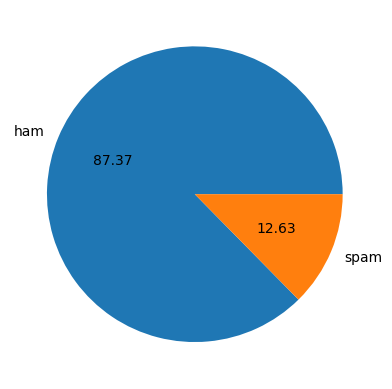

In [22]:
# Visualize the results
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

87.37% of the data is non-spam ("ham").
12.63% of the data is spam.
This means that the ratio between the two classes is roughly 7:1. This imbalance makes spam messages the minority class, and machine learning algorithms may struggle to learn patterns for identifying spam effectively.

In [24]:
# Check the text
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

### Create the important columns Num_characters, Num_words, num_sentences

In [25]:
#Show the len of each sentence
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [26]:
df['num_characters'] = df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# num of words
df['num_words'] = df['text'].apply(lambda x: len(x.split()))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [30]:
import re
df['num_sentences'] = df['text'].apply(lambda x: len(re.split(r'[.!?]+', x)) - 1)

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [32]:
# Statistics of three key columns
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.846779
std,58.236293,11.068488,1.745441
min,2.000000,1.000000,0.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,39.000000


In [33]:
# Statistics of columns where the message is no spam
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.692648
std,56.358207,11.116240,1.681598
min,2.000000,1.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,39.000000


In [34]:
# Statistics of the columns where the message is spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.912711
std,30.137753,5.967672,1.806610
min,13.000000,2.000000,0.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


Intepretation of Statistics
1. Mean and Median (50%):
On average, spam messages tend to have more characters and words compared to non-spam (ham) messages. This could indicate that spam messages are often longer and more verbose.
2. Standard Deviation (std):
Spam messages show higher variability in the number of characters and words, suggesting a wider range of message lengths. Ham messages may be more consistent in length.
3. Minimum and Maximum (min/max):
Spam messages often have fewer very short messages (higher minimum) but can have very lengthy messages (higher maximum).
4. Distribution (25%, 75%):
The interquartile range (IQR) for spam messages is broader, further supporting that spam messages can vary significantly in size.


## Visualizing the differences

#### Number of Character

<Axes: xlabel='num_characters', ylabel='Count'>

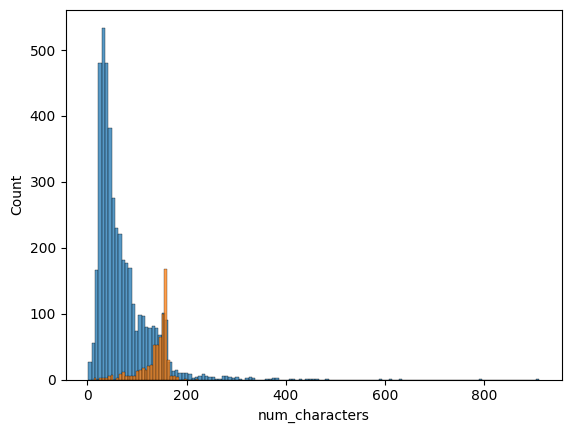

In [35]:
# Not spam
sns.histplot(df[df['target'] == 0]['num_characters'])
# Spam
sns.histplot(df[df['target'] == 1]['num_characters'])

### Number of Words

<Axes: xlabel='num_words', ylabel='Count'>

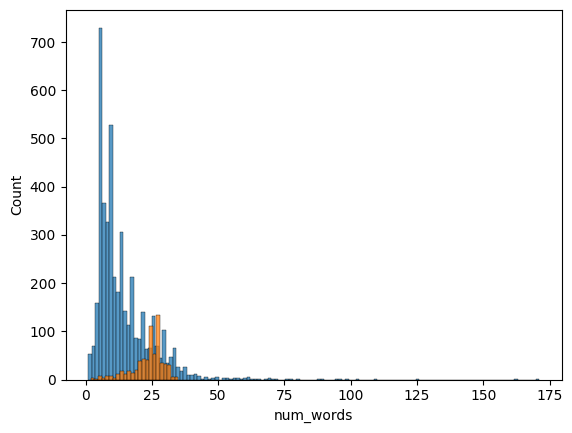

In [36]:
# Not spam
sns.histplot(df[df['target'] == 0]['num_words'])
# Spam
sns.histplot(df[df['target'] == 1]['num_words'])

### Number of Sentences

<Axes: xlabel='num_sentences', ylabel='Count'>

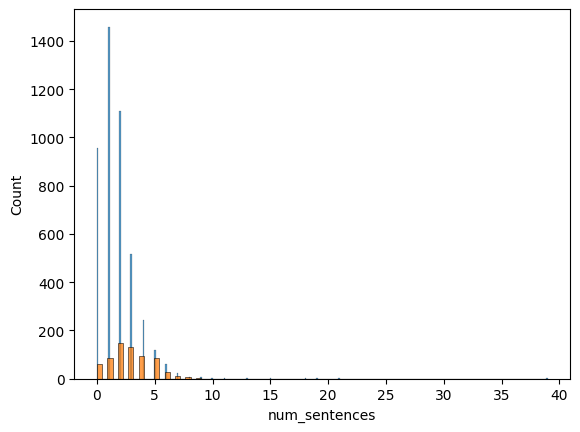

In [37]:
# Not spam
sns.histplot(df[df['target'] == 0]['num_sentences'])
# Spam
sns.histplot(df[df['target'] == 1]['num_sentences'])

### Correlation Matrix

In [39]:
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentences']].corr()
correlation_matrix

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.286576,0.232245
num_characters,0.384717,1.000000,0.973667,0.642615
num_words,0.286576,0.973667,1.000000,0.615637
num_sentences,0.232245,0.642615,0.615637,1.000000


Interpretation Of Matrix
1. target and num_characters (0.387):
There is a moderate positive correlation between being spam (target) and the number of characters. This suggests that longer messages are more likely to be spam.
2. target and num_words (0.29):
A weaker positive correlation compared to num_characters, but still suggests that spam messages tend to have more words.
3. target and num_sentences (0.076):
Very weak correlation, indicating that the number of sentences doesn't significantly differentiate spam from non-spam.
4. num_characters and num_words (0.97):
A very high positive correlation, meaning that as the number of characters increases, the number of words also increases. This is expected since longer messages generally have more words.
5. num_characters and num_sentences (0.51):
Moderate correlation showing that longer messages are likely to contain more sentences.
6. num_words and num_sentences (0.49):
A moderate correlation indicating that more words often lead to more sentences, but not perfectly.

<Axes: >

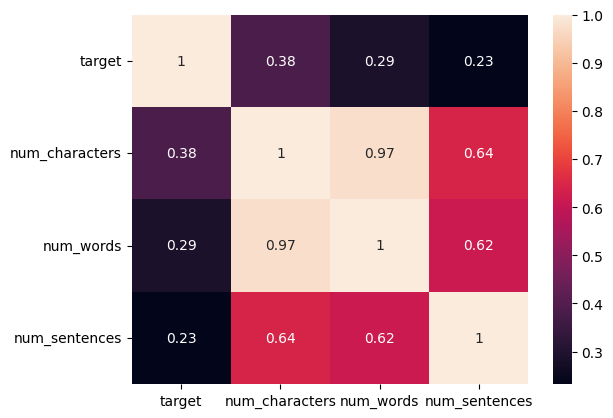

In [40]:
# Visualizing the Correlation Matrix
sns.heatmap(correlation_matrix, annot=True)

# Data Preprocessing

In [41]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Creating the Transformation Text Function

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [44]:
# Define the text transformation function
def transformation_text(text):
    # 1. Convert the text to lowercase for uniformity
    text = text.lower()
    
    # 2. Split the text into individual words (tokenization)
    text = text.split()

    # 3. Remove non-alphanumeric words
    y = []  # Create an empty list to store clean words
    for i in text:
        if i.isalnum():  # Keep only alphanumeric words (removes special characters)
            y.append(i)
            
    # 4. Reset text to the cleaned list (remove special characters)
    text = y[:]
    y.clear()  # Clear the list to reuse in the next step

    # 5. Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)  # Append words that are not stopwords or punctuation

    # 6. Perform stemming to reduce words to their root form
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))  # Apply stemming to each word
    
    # 7. Join the transformed words back into a single string and return
    return " ".join(y)

In [45]:
# Example
transformation_text('I love the youtube lectures on Machine Learning')

'love youtub lectur machin learn'

### Creating the transformed text parameter

In [46]:
df['transformed_text'] = df['text'].apply(transformation_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah think goe live around though


# Creating the Word Cloud Visualization

In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size = 10, background_color = 'white')

In [50]:
# Creating the spam wordcloud
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

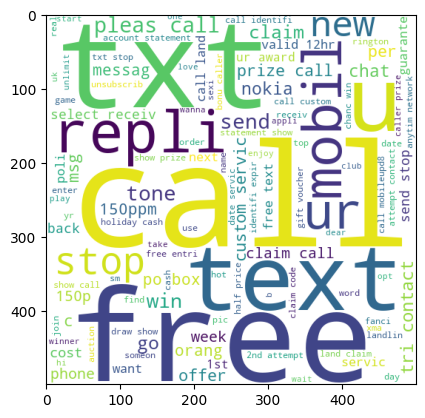

In [51]:
plt.imshow(spam_wc)

Interpretation Of Wordcloud
1. For example, if "free" is large, it means "free" appears frequently in spam messages.
2. The most prominent words are often trigger words in spam (e.g., "win", "prize", "offer").

Spam Indicators
1. If words like "urgent", "cash", or "buy now" dominate the cloud, it reveals that spam messages focus on creating urgency or promoting offers.
2. Words like "limited" or "click" may also frequently appear, indicating common spam tactics. 

In [52]:
# Not Spam
not_spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

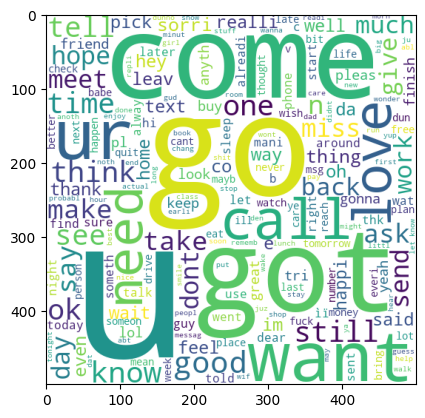

In [53]:
plt.imshow(not_spam_wc)

Interpretation of Not Spam
Expect to see words like "ok", "yes", "call", "time", "meet", "thanks", indicating casual, friendly, and informational communication.

Patterns in Non-Spam Messages:
1. Personal Pronouns: Words like "I", "you", "we" may dominate, reflecting direct communication.
2. Time References: Words such as "tomorrow", "today", "later" might appear, showing scheduling or planning discussions.

Contrast with Spam Word Cloud:
1. Unlike spam, not spam messages focus on everyday communication and lack aggressive sales language.
2. Fewer trigger words like "free" or "win".


In [54]:
# What is the text usually in the spam messages
df[df['target'] == 1]['transformed_text'].tolist() 

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri txt appli',
 'freemsg hey darl 3 word like fun tb xxx std chg rcv',
 'valu network custom select receivea prize claim call claim code valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera call mobil updat co free 08002986030',
 'six chanc win 100 pound csh11 send cost tsandc appli repli hl 4 info',
 '1 week free membership prize txt claim 81010 lccltd pobox 4403ldnw1a7rw18',
 'use click wap link next txt messag click',
 'england v macedonia dont miss txt ur nation team 87077 eg england 87077 scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free pleas call 08000930705 deliveri tomorrow',
 'ac new jersey devil detroit red wing play ice correct repli end sptv',
 '1 year special cinema pass 2 call 09061209465 c suprman etc 4 dont miss',
 'valu pleas advis follow rec

In [55]:
# Identify spam words
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist() :
    for word in msg.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

8176

# Visualization Most common words in SPAM

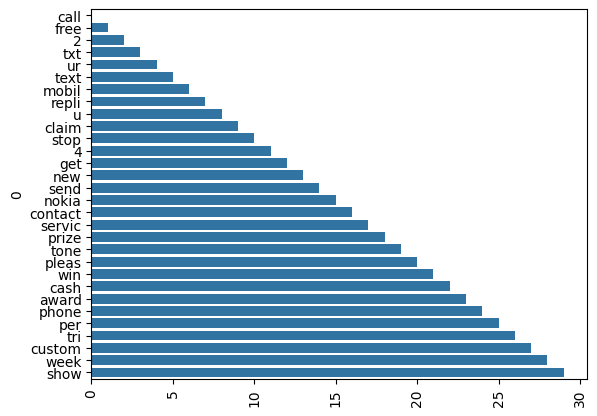

In [57]:
# most common words in spam messages
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation = 'vertical')
plt.show()

In [58]:
# not spam words
not_spam_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist() :
    for word in msg.split():
        not_spam_corpus.append(word)

In [59]:
len(not_spam_corpus)

27382

# Visualize the most common not spam words

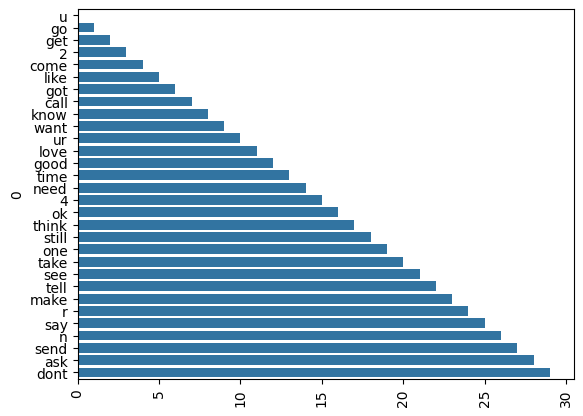

In [60]:
# most common words in not spam messages
from collections import Counter
sns.barplot(pd.DataFrame(Counter(not_spam_corpus).most_common(30))[0])
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building Section

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [62]:
# Vectorize the words, reprent each charater with o and 1
X = cv.fit_transform(df['transformed_text']).toarray()

In [63]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 5643))

In [64]:
X.shape

(5169, 5643)

In [65]:
y = df['target'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [67]:
y.shape

(5169,)

## Train - Test - Split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [70]:
# Model Num 1 MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Initialize the model
mnb = MultinomialNB()

# Train the model
mnb.fit(X_train, y_train)

# Predict
y_pred1 = mnb.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))


Accuracy: 0.9632495164410058
Confusion Matrix:
 [[877  19]
 [ 19 119]]
Precision: 0.8623188405797102


Intepretation of Results General:

High Accuracy + High Precision:
1. The model accurately identifies spam and rarely classifies ham as spam.
2. Suitable for production if spam detection needs to be highly reliable.

High Accuracy but Low Precision:
1. Although the model is generally correct, it mistakenly classifies too many ham messages as spam (high false positives).
2. This can annoy users by filtering important non-spam emails.

Low Accuracy + Low Precision:
1. The model struggles to differentiate spam from ham.
2. You may need to revisit data preprocessing, feature engineering (TF-IDF, n-grams), or try more complex models (e.g., SVM, Random Forest).


Model Based Results Interpretation
1. Out of 896 ham messages, 19 were misclassified. Out of 138 spam messages, 19 were missed.



## Model Num 2  - GaussianNb

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Initialize the model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predict
y_pred1 = gnb.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))


Accuracy: 0.7949709864603481
Confusion Matrix:
 [[705 191]
 [ 21 117]]
Precision: 0.37987012987012986


Intepretation: Out of 896 not spam messages 191 are not classified correctly. Out of 138 spam 21 are not classified correctly it is not a good model for this case

# Model Num 3 and Advisable Model

In [73]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Initialize the model
bnb = BernoulliNB()

# Train the model
bnb.fit(X_train, y_train)

# Predict
y_pred1 = bnb.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))

Accuracy: 0.9709864603481625
Confusion Matrix:
 [[892   4]
 [ 26 112]]
Precision: 0.9655172413793104


Out of 896 not spam only 4 are not classified correctly. Out of 138 Spam only 26 are not classified correctly which makes it the model of choise

# Save the model and the vectorized messages

In [74]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('BernouliClassifier.pkl','wb'))